## Plan of Action:

1.   Load Dataset
2.   Pre-process dataset by removing special characters, numbers, etc. from user reviews + convert sentiment labels positive & negative to numbers 1 & 0, respectively
3.   Import GloVe Word Embedding to build Embedding Dictionary + Use this to build Embedding Matrix for our Corpus.
4.   Model Training using Deep Learning in Keras for separate: Simple Neural Net, CNN and LSTM Models and analyse model performance and results




# Setting up Environment

In [ ]:
# # Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# # Setting toolkit folder as working directory

# %cd /content/drive/My Drive/Project8_SentimentAnalysis_with_NeuralNetwork
# ! ls

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
!pip install --upgrade keras

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB 435.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.1 MB 939.4 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.1 MB 1.6 MB/s eta 0:00:01
   -------------- ------------------------- 0.4/1.1 MB 2.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.1 MB 2.3 MB/s eta 0:00:01
   -------------------------- ------------- 0.7/1.1 MB 2.4 MB/s eta 0:00:01
   ------------------------------- -------- 0.9/1.1 MB 2.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.1 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 2.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3


In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install scikit-learn

In [ ]:
# Importing essential libraries and functions

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Loading Dataset

In [ ]:
#read the csv file on drive

path= "/content/drive/MyDrive/fypforcolab/7.8K_labelled_balanced_data_vader.csv"

data_file = pd.read_csv(path, encoding="latin-1")

In [ ]:
# prompt: read csv from C:\Users\Alwin Ashraf\Desktop\preproces\deep learning test\vader
import pandas as pd
data_file = pd.read_csv(r"C:\Users\Alwin Ashraf\Desktop\fyp dashboard\preproces\deep learning test\vader\7.8K_labelled_balanced_data_vader.csv")

In [ ]:
# Dataset exploration

data_file.head(5)

,preprocess tweet,sentiment
0,hi get someone post a room for rent without ra...,positive
1,back first rapidkl klcc kj lrt station in kual...,positive
2,back first rapidkl pasar seni kj lrt station i...,positive
3,it have be dim for a long time fuhh rapidkl ma...,positive
4,shop and win various excite prize worth up to ...,positive


In [ ]:
# Checking for missing values

data_file.isnull().values.any()

False

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='sentiment', ylabel='count'>

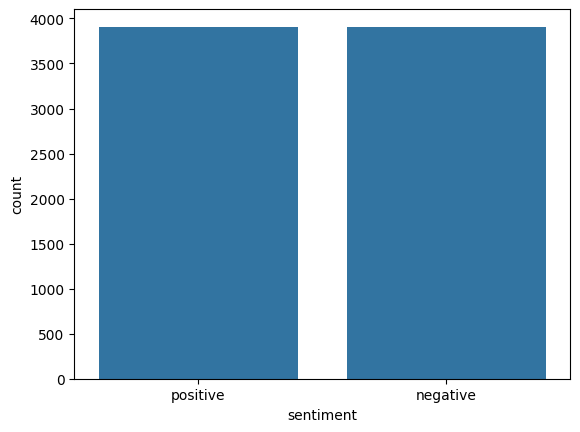

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment', data=data_file)

# Data Preprocessing

In [ ]:
data_file["preprocess tweet"][2]

'back first rapidkl pasar seni kj lrt station in kuala lumpur wp kuala lumpur'

In [ ]:
# prompt: change column head on csv

data_file = data_file.rename(columns={"preprocess tweet": "preprocess_tweet"})


In [ ]:
data_file["preprocess_tweet"][2]

'back first rapidkl pasar seni kj lrt station in kuala lumpur wp kuala lumpur'

In [ ]:
data_file.head()

,preprocess_tweet,sentiment
0,hi get someone post a room for rent without ra...,positive
1,back first rapidkl klcc kj lrt station in kual...,positive
2,back first rapidkl pasar seni kj lrt station i...,positive
3,it have be dim for a long time fuhh rapidkl ma...,positive
4,shop and win various excite prize worth up to ...,positive


In [ ]:
X = data_file['preprocess_tweet']


In [ ]:
# Converting sentiment labels to 0 & 1

y = data_file['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# The train set will be used to train our deep learning models
# while test set will be used to evaluate how well our model performs

# Preparing embedded layers

Let's now write the script for our embedding layer. Embedding layer converts our textual data into numeric form. It is then **used as the first layer for the deep learning models in Keras.**

In [ ]:
# Embedding layer expects the words to be in numeric form
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:


# Before Tokenize
print(data_file['preprocess_tweet'][0])

# After Tokenize
print(X_train[0])


hi get someone post a room for rent without rapidkl permission please take necessary action towards them and warn them to remove it immediately thanks
[  17  171    8   56    3   37  914  740    4  755  233   87  415    2
  336   25  144    2  402 1567 1031    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
import io
import json

In [ ]:
# Saving
tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

9753

In [ ]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open(r"C:\Users\Alwin Ashraf\Desktop\fyp dashboard\preproces\archive\glove.6B.100d.txt", encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
data_file.head()

,preprocess_tweet,sentiment
0,hi get someone post a room for rent without ra...,positive
1,back first rapidkl klcc kj lrt station in kual...,positive
2,back first rapidkl pasar seni kj lrt station i...,positive
3,it have be dim for a long time fuhh rapidkl ma...,positive
4,shop and win various excite prize worth up to ...,positive


In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(9753, 100)

# Convolutional Neural Network

In [ ]:
from keras.layers import Conv1D

In [ ]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(1, activation='sigmoid'))


C:\Users\Alwin Ashraf\anaconda3\envs\fyp\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Model compiling
import keras

cnn_model.compile(optimizer= keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_47 (Embedding)             │ ?                           │         975,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_36 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_21              │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 975,300 (3.72 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 975,300 (3.72 MB)

None


In [ ]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.1)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.5214 - loss: 0.6924 - val_acc: 0.6051 - val_loss: 0.6759
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.5590 - loss: 0.6782 - val_acc: 0.6776 - val_loss: 0.6623
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.6048 - loss: 0.6654 - val_acc: 0.6634 - val_loss: 0.6459
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.6438 - loss: 0.6490 - val_acc: 0.7670 - val_loss: 0.6338
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.6738 - loss: 0.6374 - val_acc: 0.7784 - val_loss: 0.6248
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.6929 - loss: 0.6269 - val_acc: 0.7784 - val_loss: 0.6084
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.7182 - loss: 0.6112 - val_acc: 0.8082 - val_loss: 0.5984
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.7466 - loss: 0.5946 - val_acc: 0.8168 - val_loss: 0.5887
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.7431

In [ ]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8647 - loss: 0.4575 


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4593406319618225
Test Accuracy: 0.8529411554336548


In [ ]:
# prompt: Model evaluation score (accuracy f1 score, precision, recall)

# Load the necessary libraries
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Get the model predictions
y_pred = cnn_model.predict(X_test)

# Binarize the predictions
y_pred_binary = [int(round(p[0])) for p in y_pred]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8529411764705882
F1 Score: 0.8382559774964838
Precision: 0.8975903614457831
Recall: 0.7862796833773087


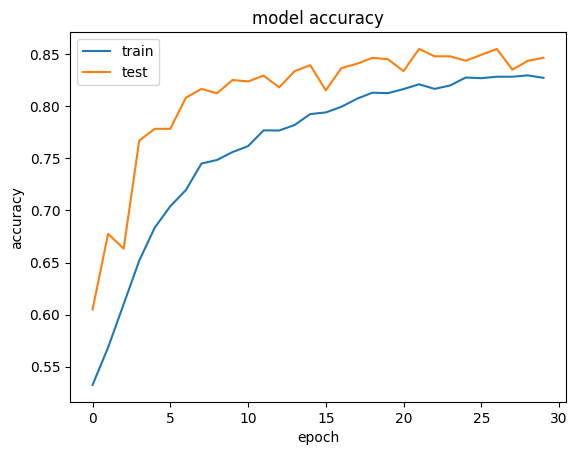

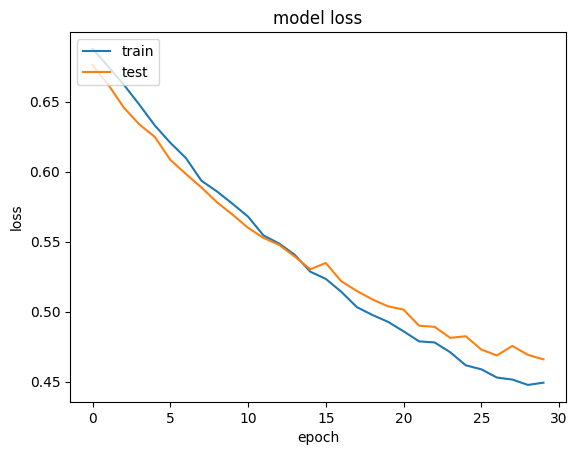

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Recurrent Neural Network (Bidrectional LSTM)

In [ ]:
from keras.layers import LSTM, Reshape, SpatialDropout1D, Bidirectional

In [ ]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(Bidirectional(tf.keras.layers.LSTM(64, dropout=0.25)))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

C:\Users\Alwin Ashraf\anaconda3\envs\fyp\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Model compiling

lstm_model.compile(optimizer= keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_48 (Embedding)             │ ?                           │         975,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_26 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 975,300 (3.72 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 975,300 (3.72 MB)

None


In [ ]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.1)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - acc: 0.5716 - loss: 0.6773 - val_acc: 0.6918 - val_loss: 0.5950
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - acc: 0.6730 - loss: 0.5945 - val_acc: 0.6932 - val_loss: 0.5826
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - acc: 0.7188 - loss: 0.5449 - val_acc: 0.7756 - val_loss: 0.5170
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - acc: 0.7285 - loss: 0.5368 - val_acc: 0.7401 - val_loss: 0.5061
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - acc: 0.7433 - loss: 0.5145 - val_acc: 0.7827 - val_loss: 0.4605
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - acc: 0.7444 - loss: 0.5085 - val_acc: 0.7202 - val_loss: 0.5126
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - acc: 0.7451 - loss: 0.4947 - val_acc: 0.7656 - val_loss: 0.4744
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - acc: 0.7472 - loss: 0.4951 - val_acc: 0.7841 - val_loss: 0.4480
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - ac

In [ ]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.8556 - loss: 0.3656


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3643038272857666
Test Accuracy: 0.8439897894859314


In [ ]:
# prompt: Model evaluation score (accuracy f1 score, precision, recall)

# Load the necessary libraries

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Get the model predictions
y_pred = lstm_model.predict(X_test)

# Binarize the predictions
y_pred_binary = [int(round(p[0])) for p in y_pred]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Accuracy: 0.8439897698209718
F1 Score: 0.8305555555555556
Precision: 0.8768328445747801
Recall: 0.7889182058047494


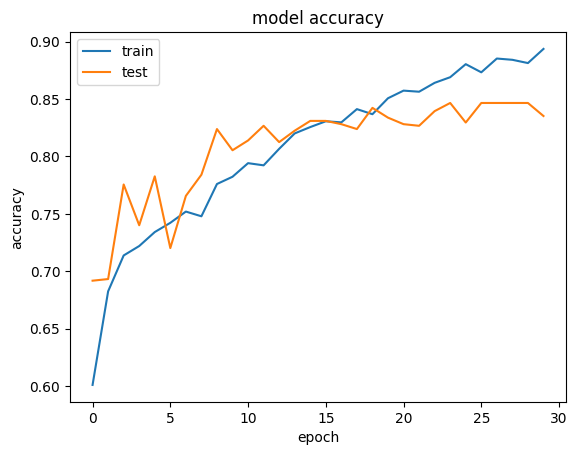

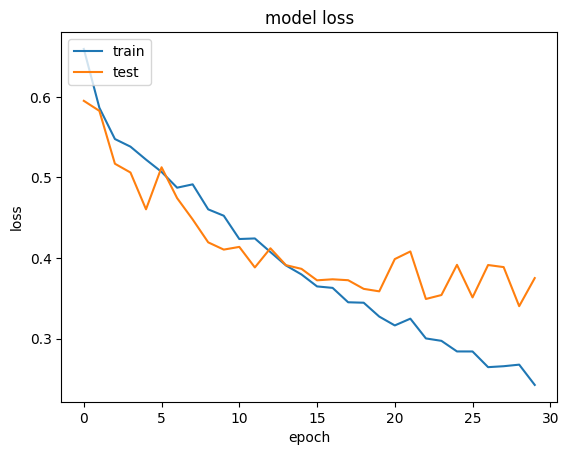

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Hybrid Model: CNN+LSTM

In [ ]:
from keras.layers import MaxPooling1D, Bidirectional, BatchNormalization

In [ ]:
print(X_train.shape)

(7034, 100)


In [ ]:
# Neural Network Architecture
hybrid1_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)


hybrid1_model.add(embedding_layer)
hybrid1_model.add(Conv1D(128, 5, activation='relu'))
hybrid1_model.add(Dropout(0.5))
hybrid1_model.add(MaxPooling1D())
hybrid1_model.add(Bidirectional(tf.keras.layers.LSTM(64, dropout=0.5)))
hybrid1_model.add(Dense(64, activation='relu'))
hybrid1_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

hybrid1_model.compile(optimizer= keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['acc'])
print(hybrid1_model.summary())

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_50 (Embedding)             │ ?                           │         975,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_38 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_28 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 975,300 (3.72 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 975,300 (3.72 MB)

None


In [ ]:
# Model Training

hybrid1_model_history = hybrid1_model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.1)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - acc: 0.5515 - loss: 0.6827 - val_acc: 0.6548 - val_loss: 0.6275
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - acc: 0.6359 - loss: 0.6340 - val_acc: 0.6406 - val_loss: 0.6274
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - acc: 0.6999 - loss: 0.5821 - val_acc: 0.7543 - val_loss: 0.5092
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - acc: 0.7428 - loss: 0.5256 - val_acc: 0.7472 - val_loss: 0.5087
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - acc: 0.7518 - loss: 0.5027 - val_acc: 0.7685 - val_loss: 0.4646
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - acc: 0.7680 - loss: 0.4689 - val_acc: 0.7884 - val_loss: 0.4555
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - acc: 0.7915 - loss: 0.4403 - val_acc: 0.7983 - val_loss: 0.4423
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - acc: 0.8120 - loss: 0.4108 - val_acc: 0.8125 - val_loss: 0.4229
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - acc: 0.8235

In [ ]:
# Predictions on the Test Set

score = hybrid1_model.evaluate(X_test, y_test, verbose=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8083 - loss: 0.4699


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4698687195777893
Test Accuracy: 0.8145779967308044


In [ ]:
# prompt: Model evaluation score (accuracy f1 score, precision, recall)

# Load the necessary libraries

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Get the model predictions
y_pred = hybrid1_model.predict(X_test)

# Binarize the predictions
y_pred_binary = [int(round(p[0])) for p in y_pred]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Accuracy: 0.8145780051150895
F1 Score: 0.8288075560802833
Precision: 0.75
Recall: 0.9261213720316622


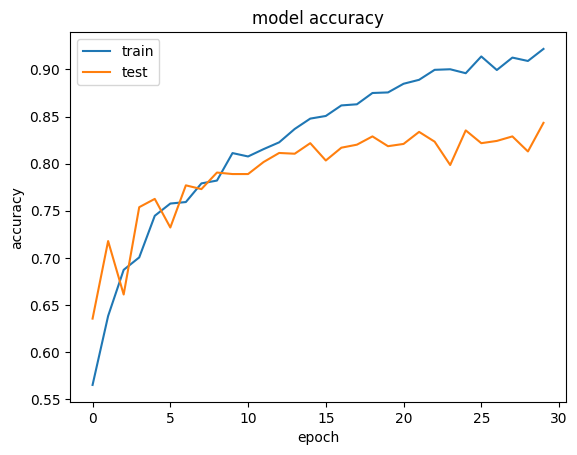

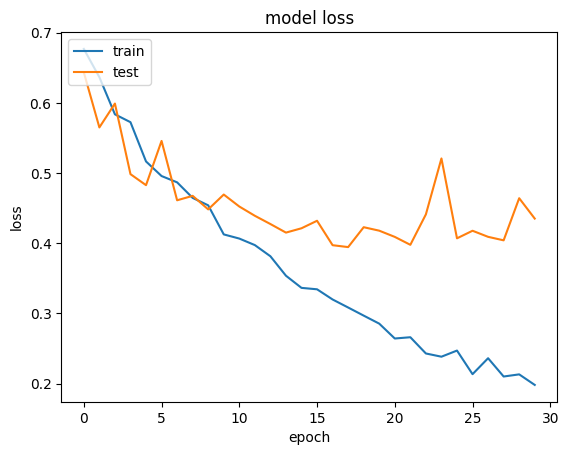

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(hybrid1_model_history.history['acc'])
plt.plot(hybrid1_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(hybrid1_model_history.history['loss'])
plt.plot(hybrid1_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# LSTM-CNN

In [ ]:
from keras.layers import MaxPooling1D, Bidirectional, BatchNormalization, Reshape, ConvLSTM1D

In [ ]:
# Neural Network Architecture
hybrid2_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)


hybrid2_model.add(embedding_layer)
hybrid2_model.add(Reshape((100, 100)))
hybrid2_model.add(Bidirectional(tf.keras.layers.LSTM(64, dropout=0.5)))
hybrid2_model.add(Conv1D(128, 5, activation='relu',input_shape=(maxlen, 128)))
hybrid2_model.add(Dropout(0.5))
hybrid2_model.add(MaxPooling1D())

hybrid2_model.add(Dense(64, activation='relu'))
hybrid2_model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Model compiling

hybrid2_model.compile(optimizer= keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['acc'])
print(hybrid2_model.summary())

Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_75 (Embedding)             │ ?                           │         911,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_21 (Reshape)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_55 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_78 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_73 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 911,700 (3.48 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 911,700 (3.48 MB)

None


In [ ]:
# Model Training

hybrid2_model_history = hybrid2_model.fit(X_train, y_train, batch_size=128, epochs=60, verbose=1, validation_split=0.25)

Epoch 1/60


ValueError: Input 0 of layer "conv1d_78" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 128)

In [ ]:
# Predictions on the Test Set

score = hybrid2_model.evaluate(X_test, y_test, verbose=1)

In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6020668745040894
Test Accuracy: 0.8164961934089661


In [ ]:
# prompt: Model evaluation score (accuracy f1 score, precision, recall)

# Load the necessary libraries

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Get the model predictions
y_pred = hybrid2_model.predict(X_test)

# Binarize the predictions
y_pred_binary = [int(round(p[0])) for p in y_pred]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(hybrid2_model_history.history['acc'])
plt.plot(hybrid2_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(hybrid2_model_history.history['loss'])
plt.plot(hybrid2_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()